# Introduction to Fourier Theory and iPython Notebooks

Renee Hlozek and Jeff McMahon

We will take a look at what Fourier transforms do in 1D and 2D.  In its simplest form, a 1D Fourier transform takes a time-varying function, measures possible cycles it contains, and returns the amplitude, offset and rotation for all cycles that were found.

An iPython Notebook consists of a standard and efficient Python back end with a web-based interface.  The interface includs both text boxes and code boxes.  The text boxes support latex math and the output of the code (both text and plots) are all stored in the document.  All cells in a given notebook share the same namespace.  This arrangement allows for increadibly well documnted code that is easy to read and support.

To get started with this intro, we must first import a number of python libraries.

In [1]:
import os
import cmath
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.cm as cmap
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

### Just some matplotlib and seaborn parameter tuning

In [2]:
axistitlesize = 20
axisticksize = 17
axislabelsize = 26
axislegendsize = 23
axistextsize = 20
axiscbarfontsize = 15

# Set axtick dimensions
major_size = 6
major_width = 1.2
minor_size = 3
minor_width = 1
mpl.rcParams['xtick.major.size'] = major_size
mpl.rcParams['xtick.major.width'] = major_width
mpl.rcParams['xtick.minor.size'] = minor_size
mpl.rcParams['xtick.minor.width'] = minor_width
mpl.rcParams['ytick.major.size'] = major_size
mpl.rcParams['ytick.major.width'] = major_width
mpl.rcParams['ytick.minor.size'] = minor_size
mpl.rcParams['ytick.minor.width'] = minor_width

mpl.rcParams.update({'figure.autolayout': False})

# Seaborn style settings
sns.set_style({'axes.axisbelow': True,
               'axes.edgecolor': '.8',
               'axes.facecolor': 'white',
               'axes.grid': True,
               'axes.labelcolor': '.15',
               'axes.spines.bottom': True,
               'axes.spines.left': True,
               'axes.spines.right': True,
               'axes.spines.top': True,
               'figure.facecolor': 'white',
               'font.family': ['sans-serif'],
               'font.sans-serif': ['Arial',
                'DejaVu Sans',
                'Liberation Sans',
                'Bitstream Vera Sans',
                'sans-serif'],
               'grid.color': '.8',
               'grid.linestyle': '--',
               'image.cmap': 'rocket',
               'lines.solid_capstyle': 'round',
               'patch.edgecolor': 'w',
               'patch.force_edgecolor': True,
               'text.color': '.15',
               'xtick.bottom': True,
               'xtick.color': '.15',
               'xtick.direction': 'in',
               'xtick.top': True,
               'ytick.color': '.15',
               'ytick.direction': 'in',
               'ytick.left': True,
               'ytick.right': True})

# Colorpalettes, colormaps, etc.
sns.set_palette(palette='rocket')

## Fourier transform

### Implement Fourier transform in standard Python

We start by writing our own <a href="https://en.wikipedia.org/wiki/Discrete_Fourier_transform">discrete Fourier transform</a>

$$
X_k = \sum_{n\ =\ 0}^{N-1} x_n e^{-2\pi i k n\ /\ N}
$$


With every Fourier trasform routine, make sure to check the normalisation and sign conventions.

In [3]:
def fourier(x):
    N = len(x)
    fourier = np.zeros(N, dtype=complex)
    for k in range(N):
        fourier_n = 0
        for n in range(N):
            fourier_n += x[n] * cmath.exp(-1j * 2* np.pi * k * n / N)
        fourier[k] = fourier_n
    return fourier

The inverse Fourier trasnform is defined as:

$$
x_n = \frac 1 N \sum_{k\ =\ 0}^{N-1} X_k e^{2\pi i k n\ /\ N}
$$


In [4]:
def inv_fourier(X):
    N = len(X)
    inv_fourier = np.zeros(N, dtype=complex)
    for n in range(N):
        inv_fourier_k = 0
        for k in range(N):
            inv_fourier_k += X[k] * cmath.exp(1j * 2 * np.pi * k * n / N)
        inv_fourier[n] = inv_fourier_k / N
    return inv_fourier

### Create sine wave signal

We want to test our code by inserting a sine wave signal and then checking that:

    (1) our Fourier transform matches the fft transform from within numpy
    (2) that if we inverse transform the Fourier transform we get the original wave back!

First we create an input sine wave signal.

In [5]:
# Set parameters of the sine wave signal 
N = 1024 # degrees (Number of samples)
a = 50 #float(np.random.randint(1, 100))  ## random integer (amplitude) between 0 and 100
f = 50 #float(np.random.randint(1, 50))   ## random integer (frequency) between 0 and 50
p = 12 #float(np.random.randint(0, 360))  ## random integer (phase) between 0 and 360

print("Input Sine Wave Paramaters:")
print("frequency = " + str(f))   ## not that strings can be added in python, very convenient
print("amplitude = " + str(a))
print("phase ang = " + str(p))

# Make a pure sine wave array
t = np.arange(0, N) / N   # A time variable from 0 to 1
fn = a * np.sin((2* np.pi * f * t) +     # 
                (p / 360 * 2 * np.pi))   # Phase

Input Sine Wave Paramaters:
frequency = 50
amplitude = 50
phase ang = 12


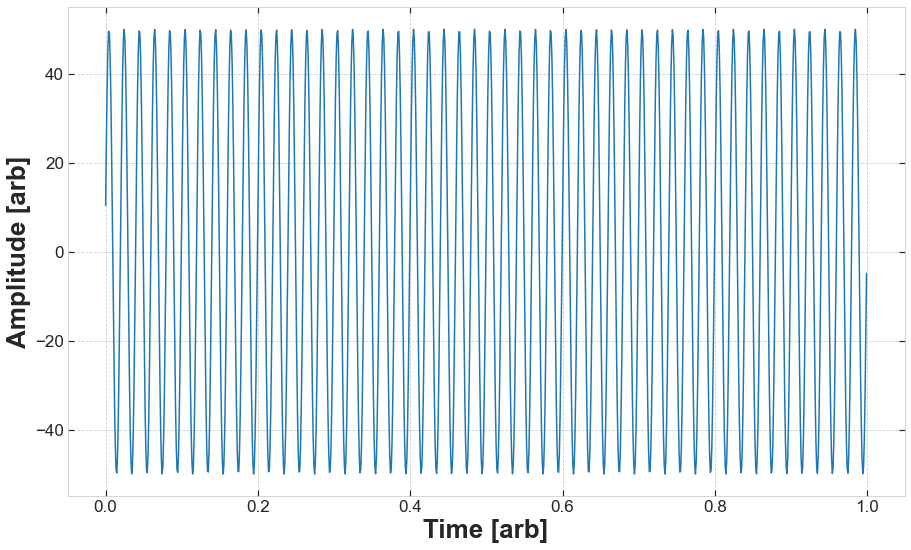

In [6]:
fig, axes = plt.subplots(figsize=(15, 9))

axes.plot(t, fn.real,
          color='tab:blue')
axes.set_xlabel('Time [arb]', fontsize=axislabelsize, fontweight='bold')
axes.set_ylabel('Amplitude [arb]', fontsize=axislabelsize, fontweight='bold')
axes.tick_params(axis='both', which='major', labelsize=axisticksize)

plt.show()

### Test created Fourier transform functions

Next we calculate the Fourier trasnform using our fourier transform function and examine the results.  

NOTE:  Given the normalization convention we have adopted we use the inverse FFT to go from time to frequency to ensure that we get a meanigful amplitude out of our results.   

In [7]:
fourier_trans = inv_fourier(fn)

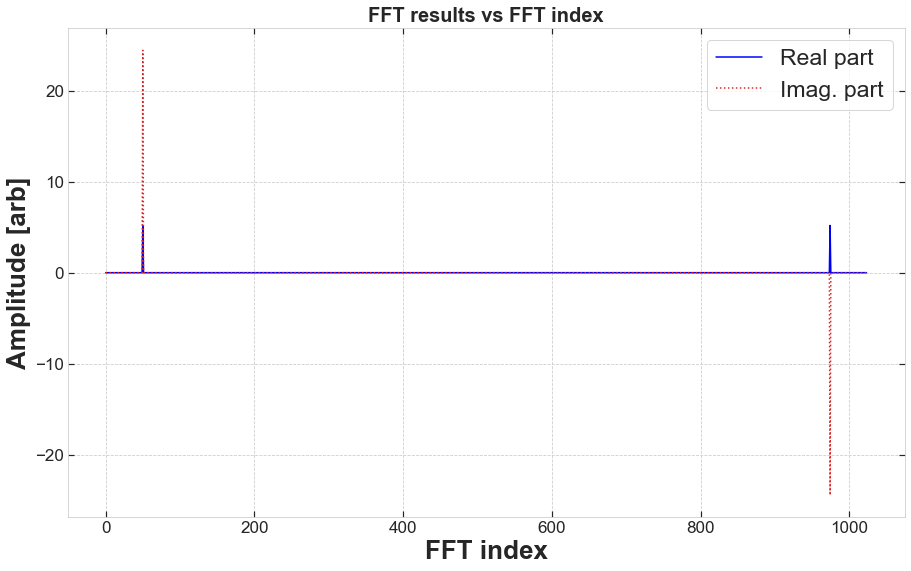

In [8]:
fig, axes = plt.subplots(figsize=(15, 9))

axes.plot((fourier_trans.real), label='Real part',
          color='blue')
axes.plot((fourier_trans.imag), label='Imag. part',
          color='tab:red', ls=':')

axes.set_title('FFT results vs FFT index', fontsize=axistitlesize, fontweight='bold')
axes.set_xlabel('FFT index', fontsize=axislabelsize, fontweight='bold')
axes.set_ylabel('Amplitude [arb]', fontsize=axislabelsize, fontweight='bold')
axes.tick_params(axis='both', which='major', labelsize=axisticksize)

axes.legend(loc='best', fontsize=axislegendsize)

plt.show()

Notes: 

    (1) The output of the FFT includes both positive and negative freuqnecy components (right and left going waves) as the algorythem can not distinguish these two cases.  

    (2) The amplitude of the waves is given by the quadrature sum of the real and imaginary parts (e.g., the magnitude of the complex FFT).

    (3) Zero frequency occurs left of the array, not in the center.   Thus you have to be very careful interpreting the frequency content.   For reference, the arrangement is right going waves on the left counting up to the max frequnecy in the array, then left going waves counting down to the first non-zero frequency on the right.

## Title

Next we create an a frequency array in the same indexing scheme of the FFT.  We do this by identifiying the highest frequnecy that can be encoded within our array (See the Nyqyist-Shannon sampling theorem).  This is called the Nyquist frequency and is calculated as

$$
f_{Nyquist} = \frac{1}{2} f_{sample},
$$
where $f_{sample} = 1/T_{sample}$ is the sampling frequency.

### Make an array to represent the frequency

In [9]:
# Step size for the `t` grid
delta_t = (t[1] - t[0])
freq_nyquist = 0.5 * (1 / delta_t)
print('Nyquist frequency: ', freq_nyquist)

freq = np.roll(np.linspace(-1, 1, N) * freq_nyquist, int(N/2))

Nyquist frequency:  512.0


### Plot the frequency array

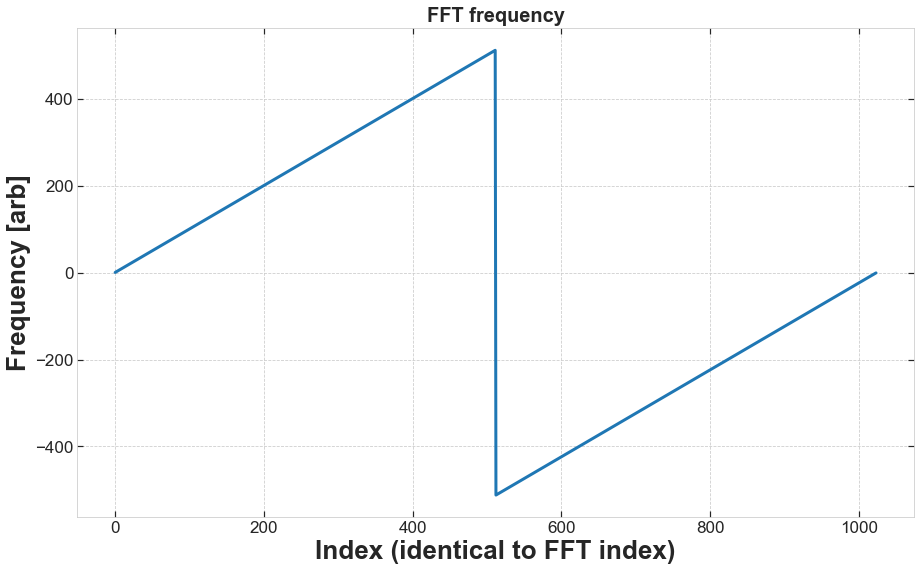

In [10]:
fig, axes = plt.subplots(figsize=(15, 9))

axes.plot(freq,
          color='tab:blue', lw=3)

axes.set_title('FFT frequency', fontsize=axistitlesize, fontweight='bold')
axes.set_xlabel('Index (identical to FFT index)', fontsize=axislabelsize, fontweight='bold')
axes.set_ylabel('Frequency [arb]', fontsize=axislabelsize, fontweight='bold')
axes.tick_params(axis='both', which='major', labelsize=axisticksize)

plt.show()

As expected the zero frequency is on the left and the maximum frequency is in the middle.  The sign of the frequency encodes right vs left going waves.

Now that we have the frequency array we can plot the FFT vs frequency and easily interpret the results.

### Make a plot of the real and imaginary parts of the FFT

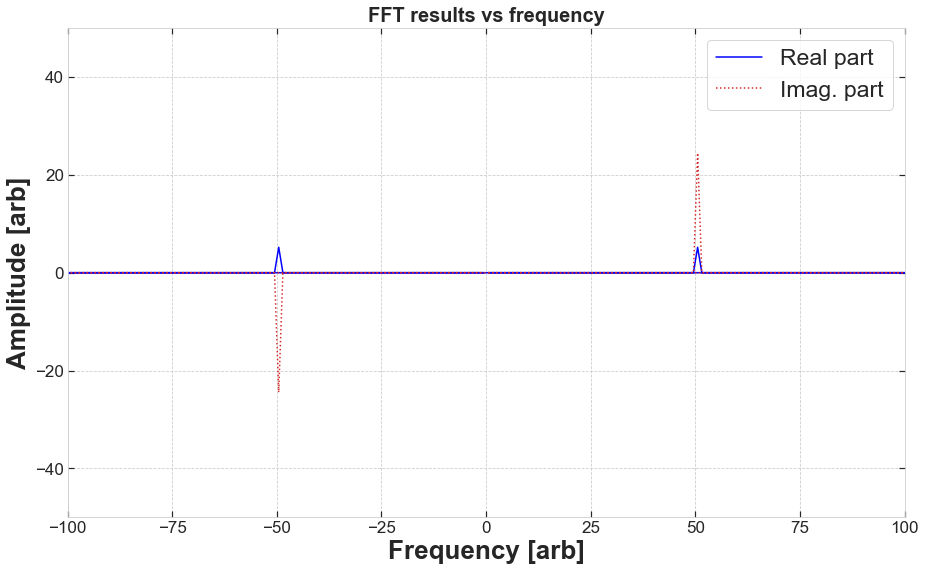

In [11]:
fig, axes = plt.subplots(figsize=(15, 9))

axes.plot(freq, (fourier_trans.real), label='Real part',
          color='blue')
axes.plot(freq, (fourier_trans.imag), label='Imag. part',
          color='tab:red', ls=':')

axes.set_xlim(-100, 100)
axes.set_ylim(-50, 50)

axes.set_title('FFT results vs frequency', fontsize=axistitlesize, fontweight='bold')
axes.set_xlabel('Frequency [arb]', fontsize=axislabelsize, fontweight='bold')
axes.set_ylabel('Amplitude [arb]', fontsize=axislabelsize, fontweight='bold')
axes.tick_params(axis='both', which='major', labelsize=axisticksize)

axes.legend(loc='best', fontsize=axislegendsize)

plt.show()

<font color='red'>EXCERCISE: </font> Convince yourself that the inverse FFT is giving the correct amplitude and frequency results.


Next we verify that the FFT and iFFT are in fact inverse functions:

In [12]:
inv_fourier_trans = fourier(fourier_trans)

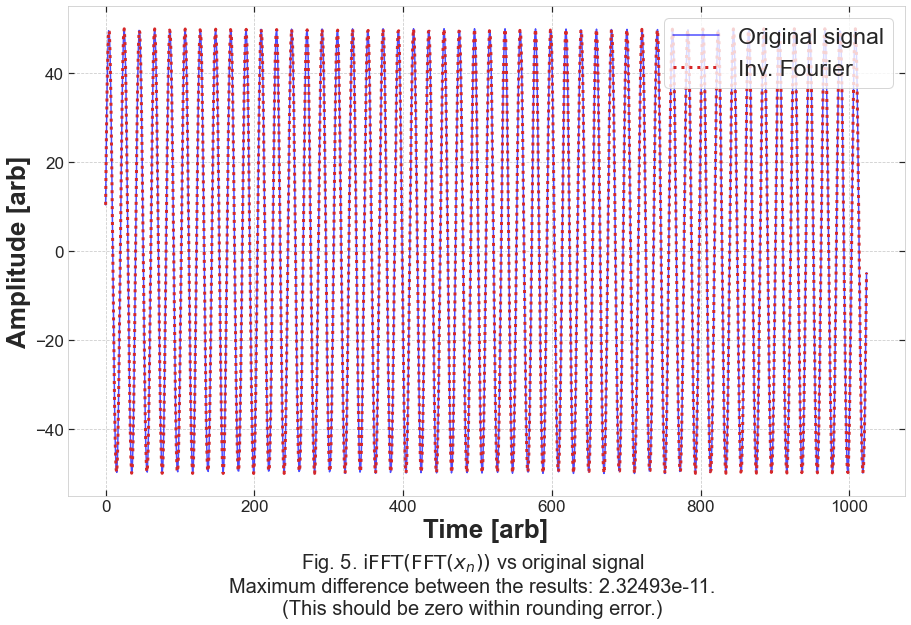

In [13]:
fig, axes = plt.subplots(figsize=(15, 9))

axes.plot(fn.real, label='Original signal',
          color='blue', alpha=0.7)
axes.plot(inv_fourier_trans.real, label='Inv. Fourier',
          color='tab:red',  lw=3, ls=':')

axes.set_xlabel('Time [arb]', fontsize=axislabelsize, fontweight='bold')
axes.set_ylabel('Amplitude [arb]', fontsize=axislabelsize, fontweight='bold')
axes.tick_params(axis='both', which='major', labelsize=axisticksize)

axes.legend(loc='upper right', fontsize=axislegendsize)

fig.suptitle('Fig. 5. $\\operatorname{iFFT} \\left( \\operatorname{FFT} \\left(x_{n} \\right) \\right)$ vs original signal\n' +
             'Maximum difference between the results: {0:.5e}.\n'.format(np.max(np.abs(inv_fourier_trans - fn))) +
             '(This should be zero within rounding error.)',
             fontsize=axistitlesize, y=0.04)
plt.show()

In the final 1-d excercise we check that the Numpy implemntation of the FFT is identical to our implemntation

In [14]:
# FFT using numpy code
ftpl = np.fft.ifft(fn)

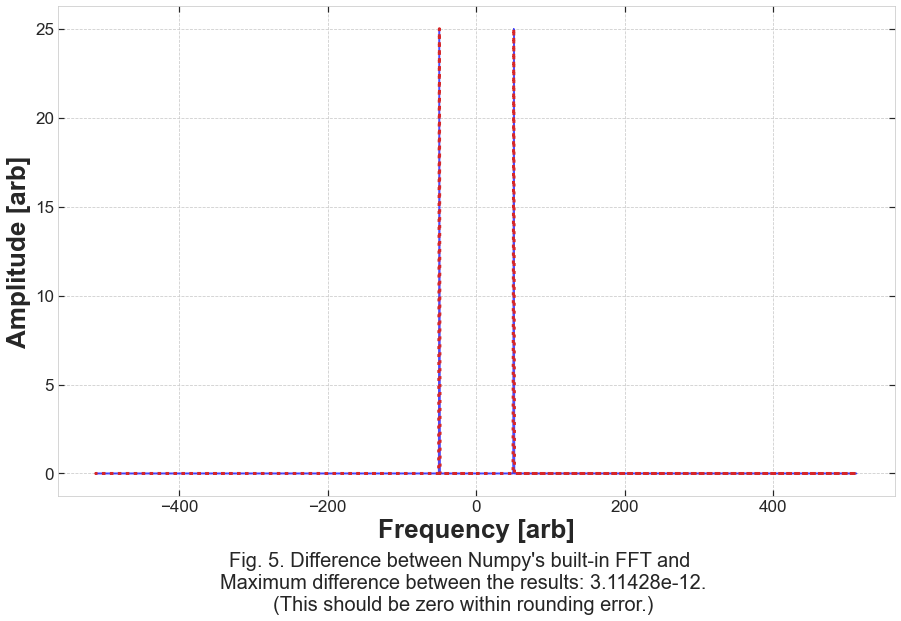

In [15]:
## make a plot comparing these functions
fig, axes = plt.subplots(figsize=(15, 9))

axes.plot(freq, np.abs(ftpl), label='Numpy FFT',
          color='blue', alpha=0.7)
axes.plot(freq, np.abs(fourier_trans), label='Custom FFT',
          color='tab:red', lw=3, ls=':')

axes.set_xlabel('Frequency [arb]', fontsize=axislabelsize, fontweight='bold')
axes.set_ylabel('Amplitude [arb]', fontsize=axislabelsize, fontweight='bold')
axes.tick_params(axis='both', which='major', labelsize=axisticksize)

fig.suptitle('Fig. 5. Difference between Numpy\'s built-in FFT and \n' +
             'Maximum difference between the results: {0:.5e}.\n'.format(np.max(np.abs(fourier_trans - ftpl))) +
             '(This should be zero within rounding error.)',
             fontsize=axistitlesize, y=0.04)

plt.show()

Unsurprisingly the two algorythms agree within numerical rounding errors.

<font color='red'>EXCERCISE: </font> Write code to generate a few functions where we know the Fourier transform well, eg. a Gaussian, a delta function etc. Use the code above and plot the FTs of these functions. Use the numpy code to check!

In [16]:
# Your code here

## Convolutions

The <a href="https://en.wikipedia.org/wiki/Convolution">convolution</a> of two discretely sampled (with $N$ samples) functions $f_i$ and $g_i$ is defined as

$$
(f \ast g)_{k} = \sum_{i\ =\ 0}^{N-1} f_{k} g_{i-k}
$$.

In other words, to calcuate the convolution: (1) muplitply two functions and sum them to get a number and (2) repeat the procedure for all possible offsets.

In the following example we compute the convolution of a gaussina with a two delta functions.

In [17]:
from scipy.stats import chi2

In [18]:
def convolution(f, g):
    g = g[::-1]
    N = f.size
    conv = np.zeros(N)
    
    for i in range(N):
        conv[i] = np.sum(f * np.roll(g, i))
    return(conv)

In [19]:
f = np.zeros(N)
f[int(N/6)] = 1
f[int(N*5/6)] = 1

g = chi2.pdf(t.real, 55)
g = g/np.max(g)

gauss = True
if gauss:
    g = np.exp(-5 * ((t - np.mean(t)) / 0.1)**2)

# Convolution of function `f` and `g`
conv = convolution(f, g)

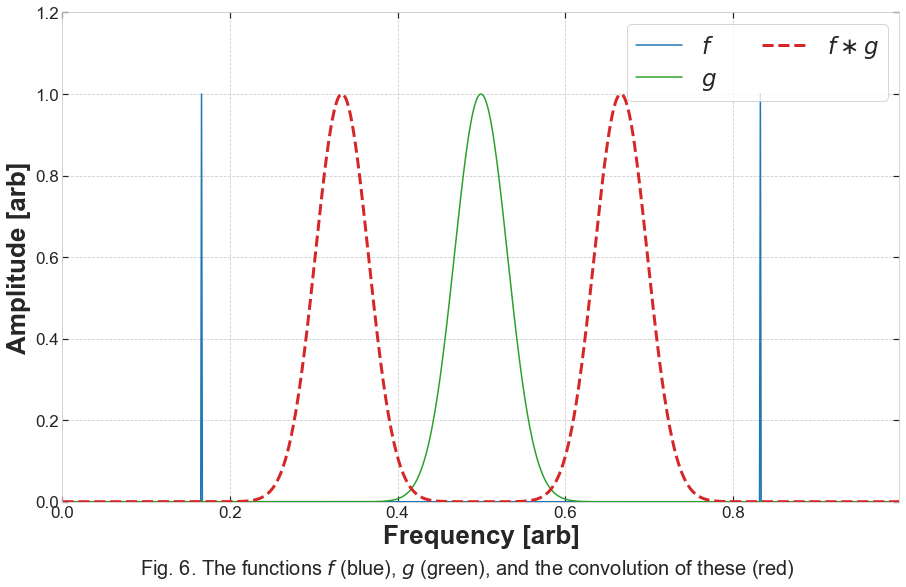

In [20]:
fig, axes = plt.subplots(figsize=(15, 9))

axes.plot(t, f, label='$f$',
          color='tab:blue')
axes.plot(t, g, label='$g$',
          color='tab:green')
axes.plot(t, conv, label='$f \\ast g$',
          color='tab:red', lw=3, ls='--')

axes.set_xlim(np.min(t), np.max(t))
axes.set_ylim(0, 1.2)

axes.set_xlabel('Frequency [arb]', fontsize=axislabelsize, fontweight='bold')
axes.set_ylabel('Amplitude [arb]', fontsize=axislabelsize, fontweight='bold')
axes.tick_params(axis='both', which='major', labelsize=axisticksize)

fig.suptitle('Fig. 6. The functions $f$ (blue), $g$ (green), and the convolution of these (red)',
             fontsize=axistitlesize, y=0.04)

axes.legend(loc='upper right', ncol=2, fontsize=axislegendsize)

plt.show()

If you selected "gaussian" to be true, note that since the green Gaussian curve is centered between the functions: the convolution peaks at points when the offsets center the gaussian on the blue delta functions.  For our applicaitons we often want to center the results such that the convolution peaks directly on the delta functions.  To do this we must center the convolving kernal (again Gaussian or $\chi^2$ depending on what you chose above) at zero frequency which following the convention in the FFT is the left edge of the array.  We do this in the following example.

In [21]:
conv_prev = convolution(f, g)
# Roll the function `g` by the Nyquist frequency to shift it
conv = convolution(f, np.roll(g, int(N/2)))

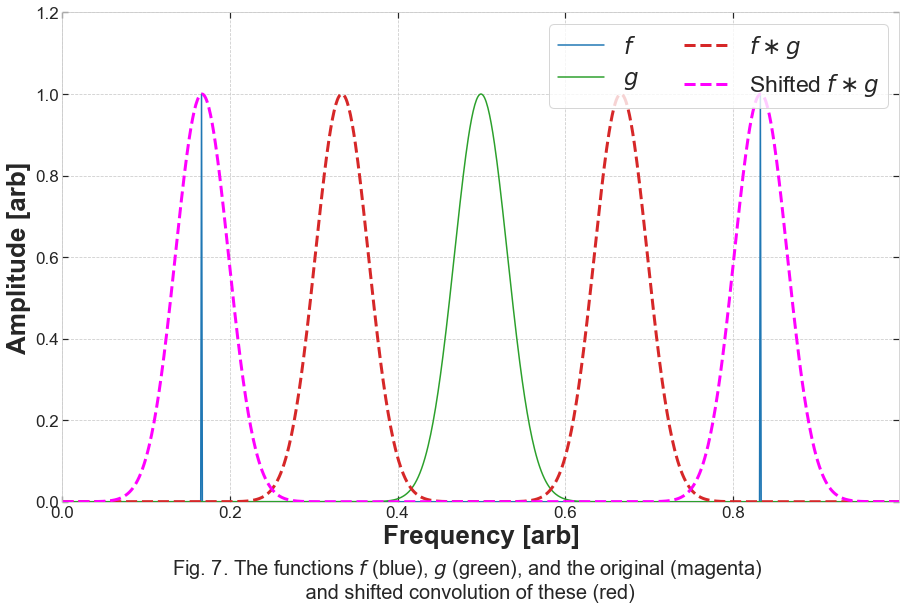

In [22]:
fig, axes = plt.subplots(figsize=(15, 9))

axes.plot(t, f, label='$f$',
          color='tab:blue')
axes.plot(t, g, label='$g$',
          color='tab:green')
axes.plot(t, conv_prev, label='$f \\ast g$',
          color='tab:red', lw=3, ls='--')
axes.plot(t, conv, label='Shifted $f \\ast g$',
          color='magenta', lw=3, ls='--')

axes.set_xlim(np.min(t), np.max(t))
axes.set_ylim(0, 1.2)

axes.set_xlabel('Frequency [arb]', fontsize=axislabelsize, fontweight='bold')
axes.set_ylabel('Amplitude [arb]', fontsize=axislabelsize, fontweight='bold')
axes.tick_params(axis='both', which='major', labelsize=axisticksize)

fig.suptitle('Fig. 7. The functions $f$ (blue), $g$ (green), and the original (magenta)\n and shifted convolution of these (red)',
             fontsize=axistitlesize, y=0.04)

axes.legend(loc='upper right', ncol=2, fontsize=axislegendsize)

plt.show()

Given the uniquity of the need to center convolutions this way numpy has an "fftshift" function built in to do this, rather than us using the roll function. The fftshift computes the Nyquist frequency if the lenght of the vector is even, and shifts by that amount, so that the zero-frequency component is at the center of the spectrum.

Speed is a big issue in convolutions.  Conveniently there is a way to massively accelerate this algorythem using the FFT with the convolution theorem:

$$
\left( f  * g \right) = \operatorname{iFFT} \left( \operatorname{FFT}(f) * \operatorname{FFT}(g) \right)
$$

In other words the convoluiton is the inverse fourier transform of the product of the fourier transforms of the two functions.

In [23]:
def fft_convolve(f, g):
    
    FFTf = fourier(f)
    FFTg = fourier(g)
    conv = inv_fourier(FFTf*FFTg)
    
    return conv

In [24]:
conv = fft_convolve(f, np.roll(g, int(N/2)))
npconv = fft_convolve(f, np.fft.fftshift(g))

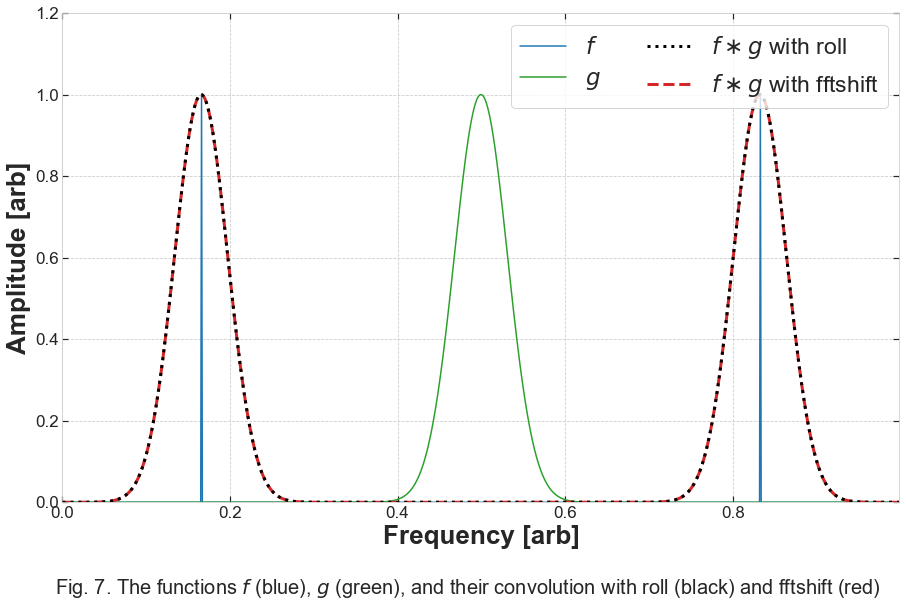

In [25]:
fig, axes = plt.subplots(figsize=(15, 9))

axes.plot(t, f, label='$f$',
          color='tab:blue')
axes.plot(t, g, label='$g$',
          color='tab:green')
axes.plot(t, conv.real, label='$f \\ast g$ with roll',
          color='black', lw=3, ls=':', alpha=1, zorder=3)
axes.plot(t, npconv.real, label='$f \\ast g$ with fftshift',
          color='tab:red', lw=3, ls='--', alpha=1)

axes.set_xlim(np.min(t), np.max(t))
axes.set_ylim(0, 1.2)

axes.set_xlabel('Frequency [arb]', fontsize=axislabelsize, fontweight='bold')
axes.set_ylabel('Amplitude [arb]', fontsize=axislabelsize, fontweight='bold')
axes.tick_params(axis='both', which='major', labelsize=axisticksize)

fig.suptitle('Fig. 7. The functions $f$ (blue), $g$ (green), and their convolution with roll (black) and fftshift (red)',
             fontsize=axistitlesize, y=0.01)

axes.legend(loc='upper right', ncol=2, fontsize=axislegendsize)

plt.show()

As expected the results are the same for this method as for the direct method.

## Centering and FFTs

Centering of the input to the FFT is realted to the phase in the output.  In the following example (which is a cautionary tale) we see how offsetting the input can result in a strong phase modultion (eg rotation beteen real and imaginary) in the ouput.

In [26]:
g = np.exp(-5 * ((t - np.mean(t))/0.1)**2)

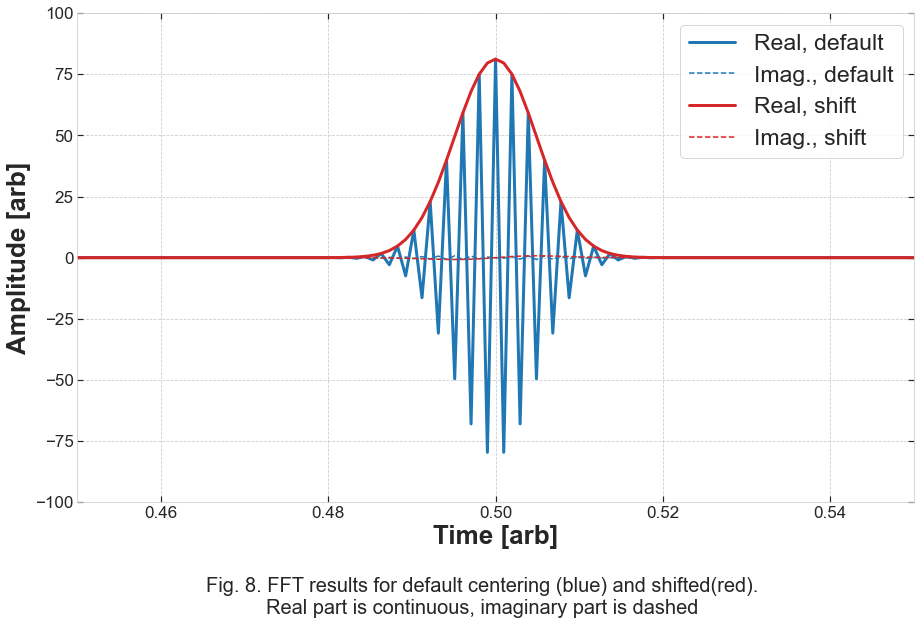

In [27]:
fig, axes = plt.subplots(figsize=(15, 9))

# Default centering
axes.plot(t, np.fft.fftshift(np.fft.fft(g).real), label='Real, default',
          color='tab:blue', lw=3)
axes.plot(t, np.fft.fftshift(np.fft.fft(g).imag), label='Imag., default',
          color='tab:blue', ls='--')
# Centering with a shift of the input
axes.plot(t, np.fft.fftshift(np.fft.fft(np.fft.fftshift(g)).real), label='Real, shift',
          color='tab:red', lw=3)
axes.plot(t, np.fft.fftshift(np.fft.fft(np.fft.fftshift(g)).imag), label='Imag., shift',
          color='tab:red', ls='--')

axes.set_xlim(0.45, 0.55)
axes.set_ylim(-100, 100)

axes.set_xlabel('Time [arb]', fontsize=axislabelsize, fontweight='bold')
axes.set_ylabel('Amplitude [arb]', fontsize=axislabelsize, fontweight='bold')
axes.tick_params(axis='both', which='major', labelsize=axisticksize)

axes.legend(loc='best', fontsize=axislegendsize)
fig.suptitle('Fig. 8. FFT results for default centering (blue) and shifted(red).\nReal part is continuous, imaginary part is dashed',
             fontsize=axistitlesize, y=0.01)

plt.show()

It is clear that both centerings give the same info, but the phase has been rotated to make the result purely real by shifting the input before the FFT.  If you see oscillaitons in your FFT results, this is almost always what is happening.

# Two dimensional FFTs

FFT2 implements the fourier transform in two dimensions. We will use the fft2 functionality of Numpy extensively in this course so here we build a few examples.   First we will generate a 2D gaussian and visualize its 2d fft.

In [28]:
## First make a coordinate system
# Number of points along an axis
N = 256
# Make a 2d array of x and y coordinates
x, y = np.meshgrid(np.linspace(-1, 1, N), np.linspace(-1, 1, N))
# Calculate the radial coordinate of each pixel
r = np.sqrt(x**2 + y**2)

# Now make a 2D Gaussian
gaussian_2d = np.exp(-0.5 * (r/0.05)**2)

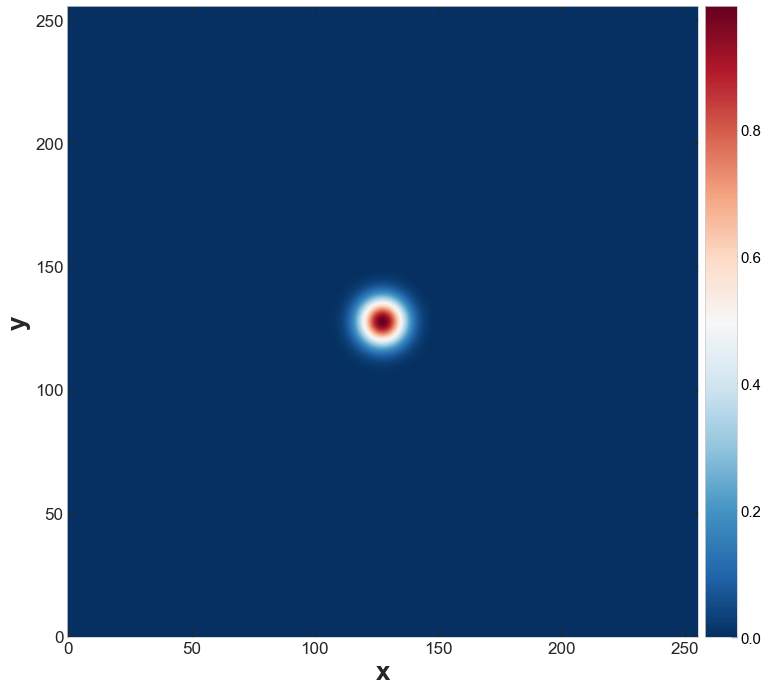

In [29]:
fig, axes = plt.subplots(figsize=(12, 12))
axes.set_aspect('equal')
axes.grid(False)

im = axes.imshow(gaussian_2d, interpolation='bilinear', origin='lower', cmap=cmap.RdBu_r)

axes.set_xlabel('x', fontsize=axislabelsize, fontweight='bold')
axes.set_ylabel('y', fontsize=axislabelsize, fontweight='bold')
axes.tick_params(axis='both', which='major', labelsize=axisticksize)

# Create an axis on the right side of `axes`. The width of `cax` will be 5%
# of `axes` and the padding between `cax` and axes will be fixed at 0.1 inch
divider = make_axes_locatable(axes)
cax = divider.append_axes('right', size='5%', pad=0.1)
cbar = plt.colorbar(mappable=im, cax=cax)
cbar.ax.tick_params(labelsize=axiscbarfontsize, colors='black')

plt.show()

In [30]:
# Calculate the 2D FFT of our Gaussian
fft_ga_2d = np.fft.fft2(gaussian_2d)

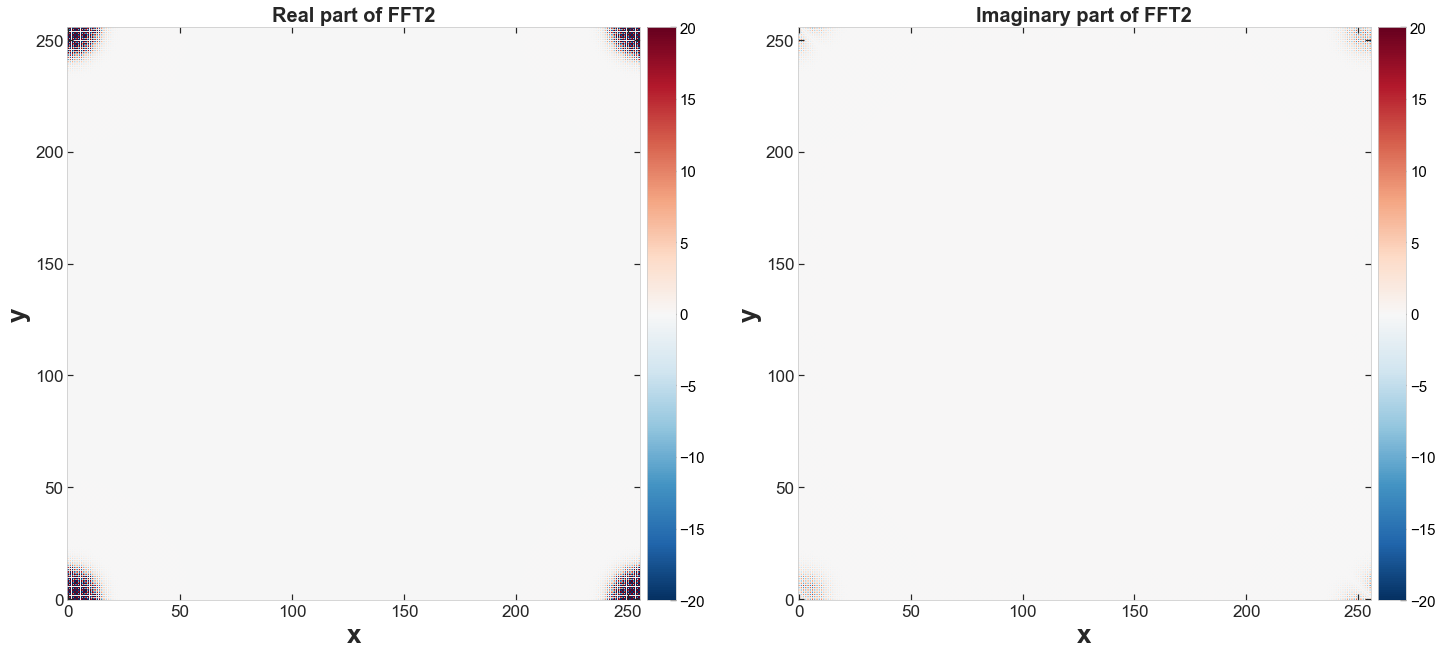

In [31]:
nrows = 1
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*12, nrows*12))

plotted = [fft_ga_2d.real, fft_ga_2d.imag]
titles = ['Real part of FFT2', 'Imaginary part of FFT2']

for i in range(ncols):
    ax = axes[i]
    ax.set_aspect('equal')
    ax.grid(False)

    im = ax.imshow(plotted[i], vmin=-20, vmax=20,
                   interpolation='bilinear', origin='lower', cmap=cmap.RdBu_r)
    
    ax.set_title(titles[i], fontsize=axistitlesize, fontweight='bold')
    ax.set_xlabel('x', fontsize=axislabelsize, fontweight='bold')
    ax.set_ylabel('y', fontsize=axislabelsize, fontweight='bold')
    ax.tick_params(axis='both', which='major', labelsize=axisticksize)
    
    # Create an axis on the right side of `axes`. The width of `cax` will be 5%
    # of `axes` and the padding between `cax` and axes will be fixed at 0.1 inch
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.1)
    cbar = plt.colorbar(mappable=im, cax=cax)
    cbar.ax.tick_params(labelsize=axiscbarfontsize, colors='black')

plt.show()

From this example we see that

    (1) the FFT of a gaussian is a gaussian,
    (2) the FFT is a complex quantity,
    (2) the smaller the gaussian the bigger the FFT of it is (eg the uncertainty principle), and
    (3) the result is centered at zero frequency just as we would expect from the 1d example.
    
    
Depending on the application we must often carefully consider the centering of the input and output arrays.  Note above that the results oscillate on the pixel scale betwen positive and negative.  This is a results of the centering choices of the input array.  We must fix this with shfits just as we did in the 1D example.

Here we illustrate this with the following examples.  First we shift the input array using fftshift:

In [32]:
fftsh_ga_2d = np.fft.fft2(np.fft.fftshift(gaussian_2d))

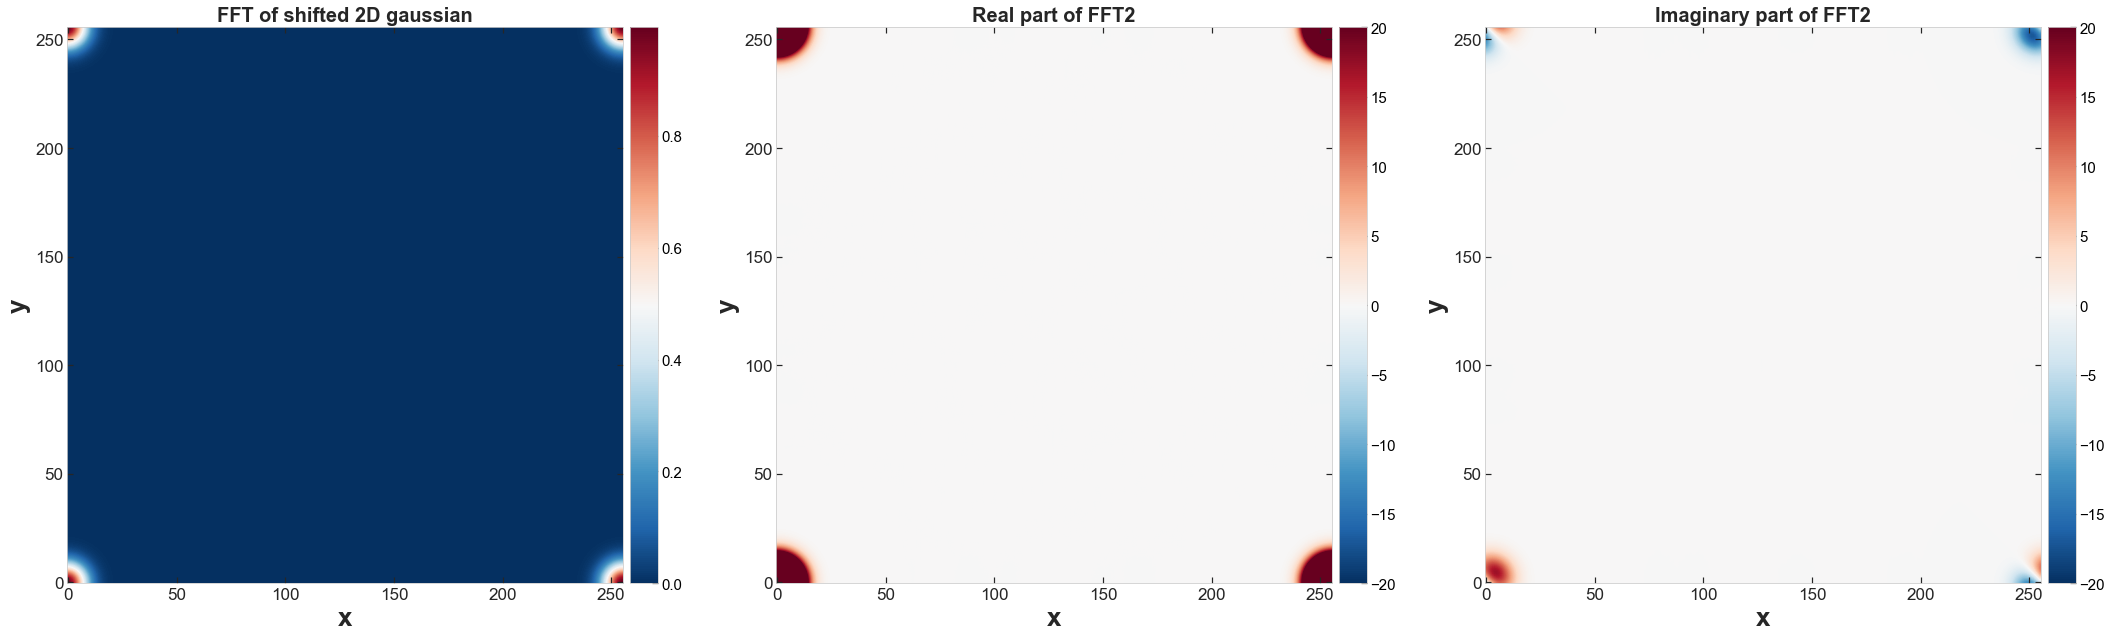

In [33]:
nrows = 1
ncols = 3
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*12, nrows*12))

plotted = [np.fft.fftshift(gaussian_2d), fftsh_ga_2d.real, fftsh_ga_2d.imag]
titles = ['FFT of shifted 2D gaussian', 'Real part of FFT2', 'Imaginary part of FFT2']

for i in range(ncols):
    ax = axes[i]
    ax.set_aspect('equal')
    ax.grid(False)

    if i != 0:
        vmin = -20
        vmax = 20
    else:
        vmin = None
        vmax = None
    im = ax.imshow(plotted[i], vmin=vmin, vmax=vmax,
                   interpolation='bilinear', origin='lower', cmap=cmap.RdBu_r)
    
    ax.set_title(titles[i], fontsize=axistitlesize, fontweight='bold')
    ax.set_xlabel('x', fontsize=axislabelsize, fontweight='bold')
    ax.set_ylabel('y', fontsize=axislabelsize, fontweight='bold')
    ax.tick_params(axis='both', which='major', labelsize=axisticksize)
    
    # Create an axis on the right side of `axes`. The width of `cax` will be 5%
    # of `axes` and the padding between `cax` and axes will be fixed at 0.1 inch
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.1)
    cbar = plt.colorbar(mappable=im, cax=cax)
    cbar.ax.tick_params(labelsize=axiscbarfontsize, colors='black')

plt.show()

Note the FFT shift of the input array did not change the centering of the output array, but it did get rid of the oscillations.  We next also shift the output:

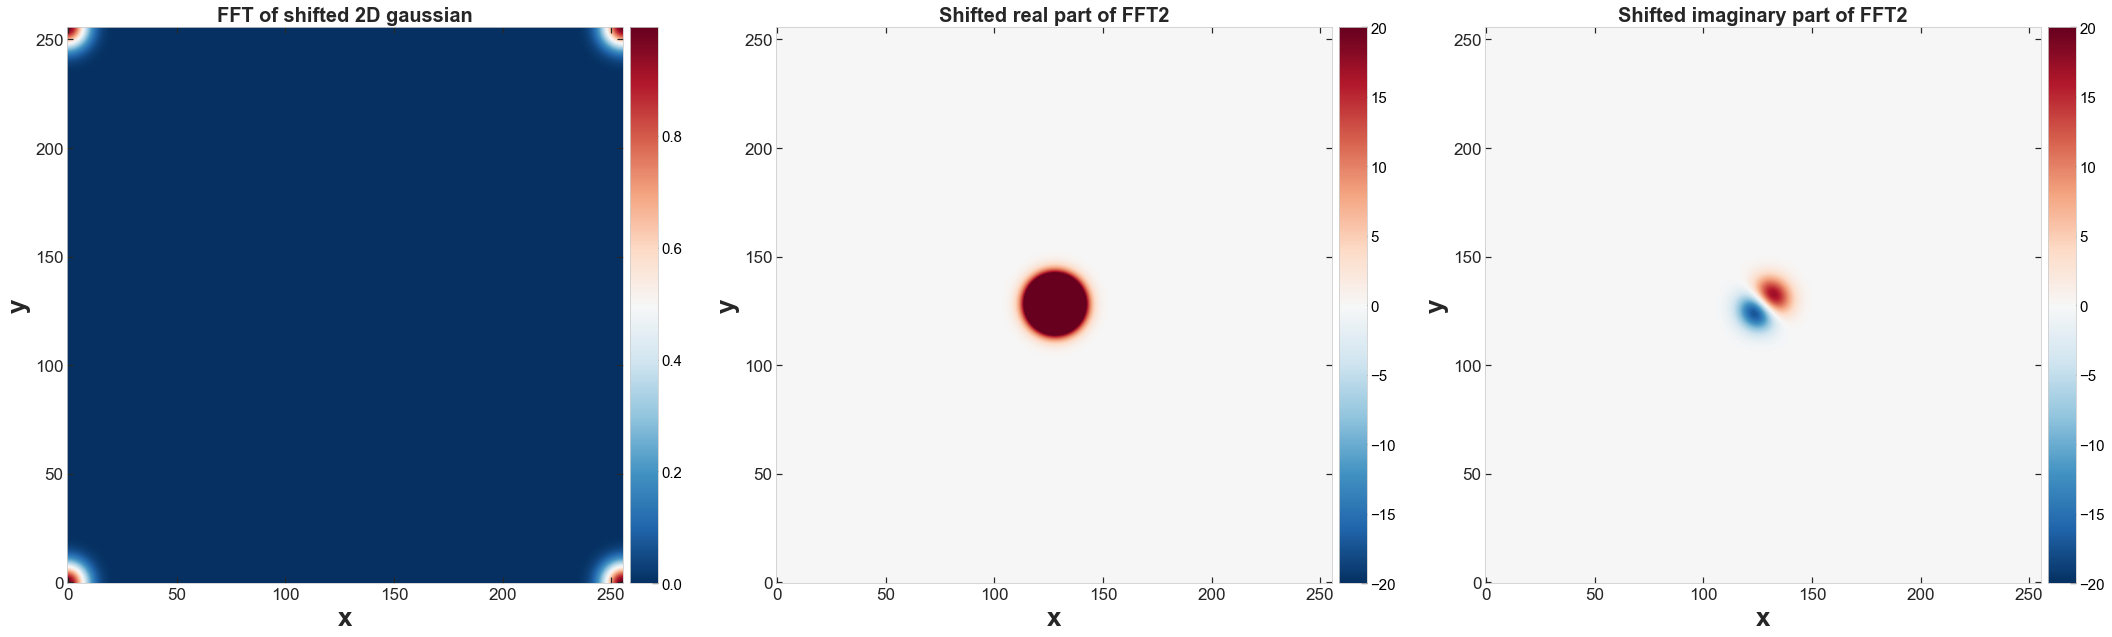

In [34]:
nrows = 1
ncols = 3
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*12, nrows*12))

plotted = [np.fft.fftshift(gaussian_2d), np.fft.fftshift(fftsh_ga_2d.real), np.fft.fftshift(fftsh_ga_2d.imag)]
titles = ['FFT of shifted 2D gaussian', 'Shifted real part of FFT2', 'Shifted imaginary part of FFT2']

for i in range(ncols):
    ax = axes[i]
    ax.set_aspect('equal')
    ax.grid(False)

    if i != 0:
        vmin = -20
        vmax = 20
    else:
        vmin = None
        vmax = None
    im = ax.imshow(plotted[i], vmin=vmin, vmax=vmax,
                   interpolation='bilinear', origin='lower', cmap=cmap.RdBu_r)
    
    ax.set_title(titles[i], fontsize=axistitlesize, fontweight='bold')
    ax.set_xlabel('x', fontsize=axislabelsize, fontweight='bold')
    ax.set_ylabel('y', fontsize=axislabelsize, fontweight='bold')
    ax.tick_params(axis='both', which='major', labelsize=axisticksize)
    
    # Create an axis on the right side of `axes`. The width of `cax` will be 5%
    # of `axes` and the padding between `cax` and axes will be fixed at 0.1 inch
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.1)
    cbar = plt.colorbar(mappable=im, cax=cax)
    cbar.ax.tick_params(labelsize=axiscbarfontsize, colors='black')

plt.show()

Depending on the appliation we will shift the input and output arrays to make sense of the results.

## 2D convolution

In the final example we present a 2d convolution, something that we use a lot in CMB analysis.

In [35]:
map_2d = np.zeros([N, N])
map_2d[int(N/3), int(N/3)] = 1
map_2d[int(N*2/3), int(N*2/3)] = 0.5
map_2d[int(N/3), int(N*2/3)] = -0.5
map_2d[int(N*2/3), int(N/3)] = -1

conv_2d = np.fft.ifft2(np.fft.fft2(np.fft.fftshift(gaussian_2d)) * np.fft.fft2(map_2d))

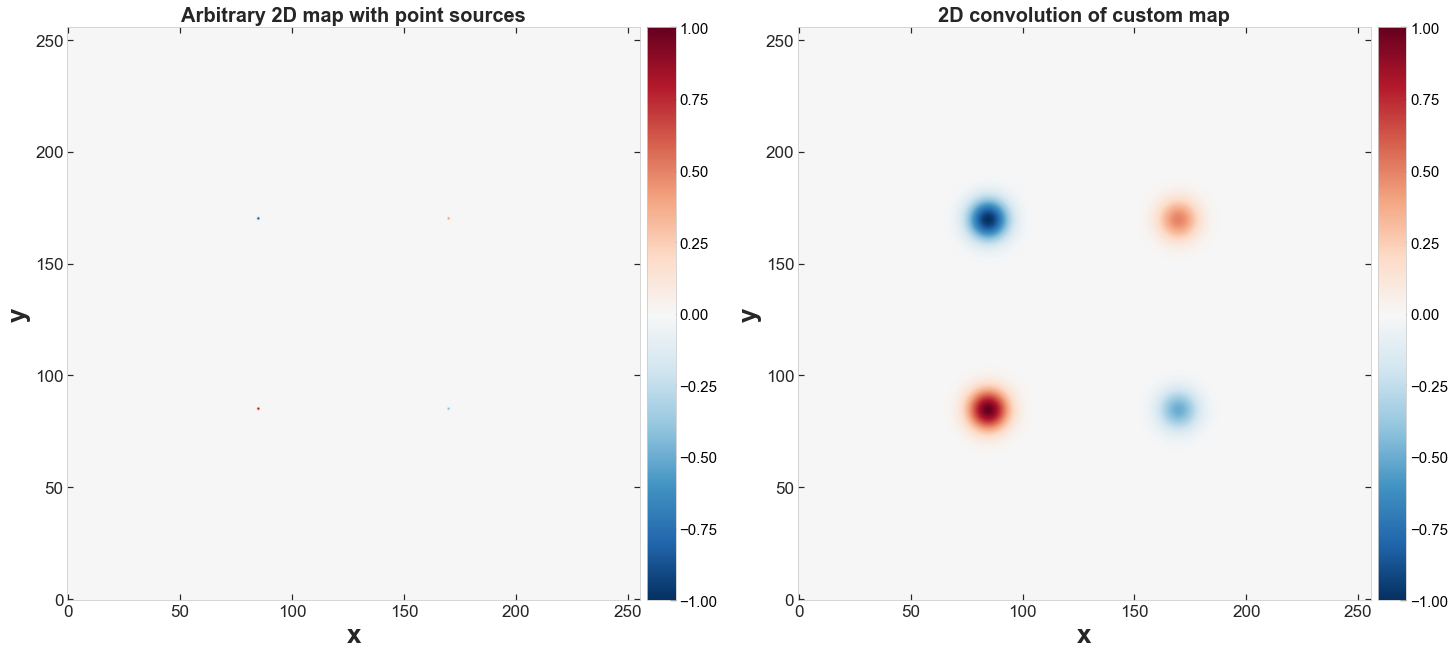

In [36]:
nrows = 1
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*12, nrows*12))

plotted = [map_2d, conv_2d.real]
titles = ['Arbitrary 2D map with point sources', '2D convolution of custom map']

for i in range(ncols):
    ax = axes[i]
    ax.set_aspect('equal')
    ax.grid(False)

    im = ax.imshow(plotted[i], vmin=-1, vmax=1,
                   interpolation='bilinear', origin='lower', cmap=cmap.RdBu_r)
    
    ax.set_title(titles[i], fontsize=axistitlesize, fontweight='bold')
    ax.set_xlabel('x', fontsize=axislabelsize, fontweight='bold')
    ax.set_ylabel('y', fontsize=axislabelsize, fontweight='bold')
    ax.tick_params(axis='both', which='major', labelsize=axisticksize)
    
    # Create an axis on the right side of `axes`. The width of `cax` will be 5%
    # of `axes` and the padding between `cax` and axes will be fixed at 0.1 inch
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.1)
    cbar = plt.colorbar(mappable=im, cax=cax)
    cbar.ax.tick_params(labelsize=axiscbarfontsize, colors='black')

plt.show()

For this applicaiton centering the kernel on zero frequency centers the peaks of the convolution on the peaks of the input map.  We will use this approach to generate realizations of point sources.